<a href="https://colab.research.google.com/github/OmarK920/Data-Science-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study:**

As we know, it is much more expensive for a company to sign in a new client than keeping an existing one.

It is advantageous for them to know what leads a client towards the decision to leave the company.

Churn prediction allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# Importing and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/churn.csv')

# Basic Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [4]:
# i dont need the columns 'RowNumber', 'CustomerId', 'Surname'
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing And Cleaning

*  Handling Null Values
*  Handling Duplicates
*  Removing Unecessary Columns
*  Handling outliers





In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]
#no duplicates

0

In [3]:
# remove unecessary columns = 'RowNumber', 'CustomerId', 'Surname'

df.drop(['RowNumber', 'CustomerId' , 'Surname'], axis=1, inplace=True)

In [16]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

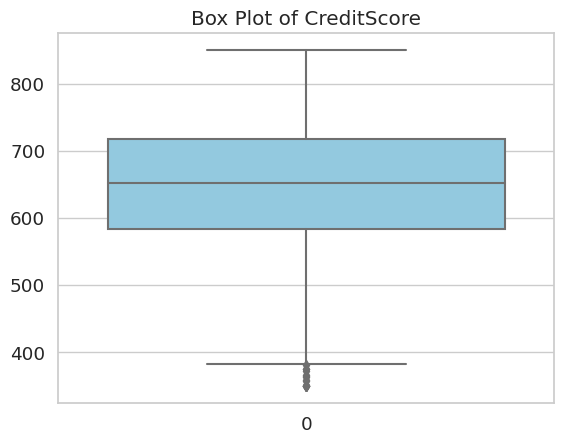

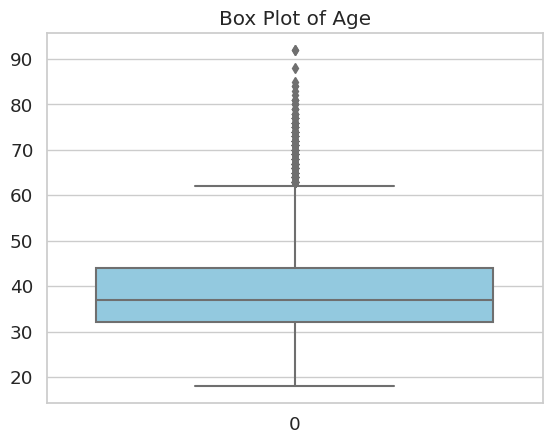

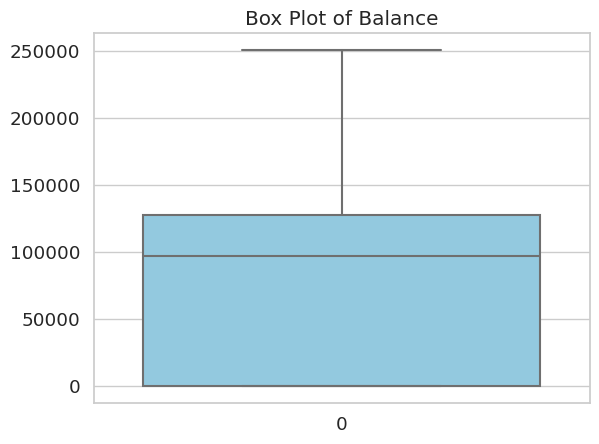

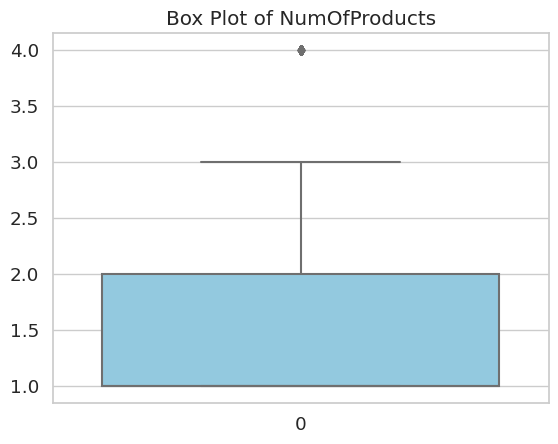

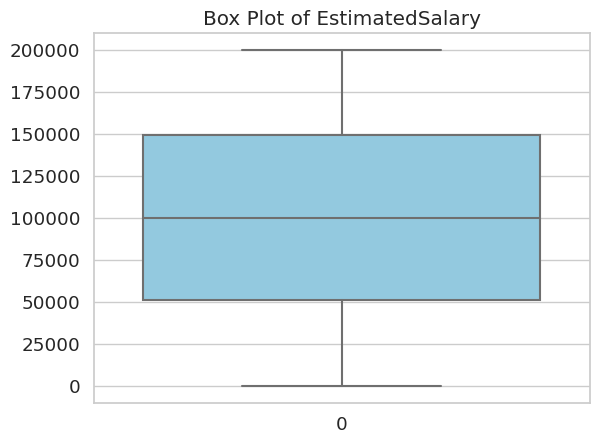

In [25]:
# Set up Seaborn style and context (optional but enhances visual aesthetics)
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create separate box plots for each column
columns_to_plot = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for column in columns_to_plot:
    plt.figure()
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.show()


# Data Visualization

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


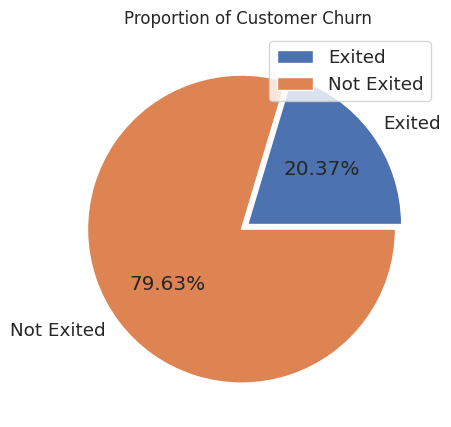

In [36]:
#Create a list that contains the number of exited customer
ExitedList = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(5, 5))
plt.title('Proportion of Customer Churn', size = 12)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Not Exited'], autopct='%.2f%%', explode = (0 , 0.05))
plt.legend(labels = ['Exited', 'Not Exited'], loc = "upper right")
plt.show()

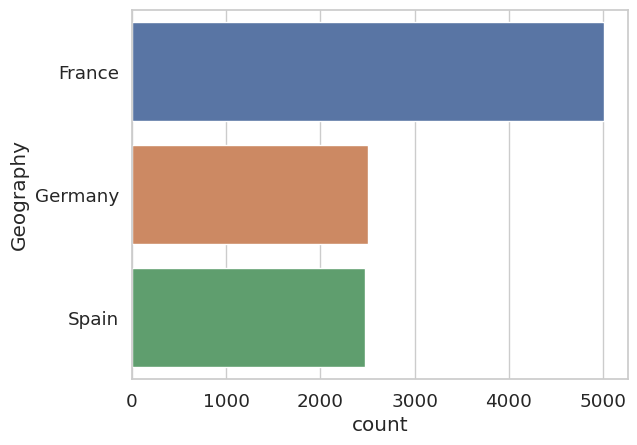

In [45]:
#Vislization of the count of each value in Geography featrure
sns.countplot(y=df['Geography'], data=df, order = df['Geography'].value_counts().index)
plt.show()


In [38]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

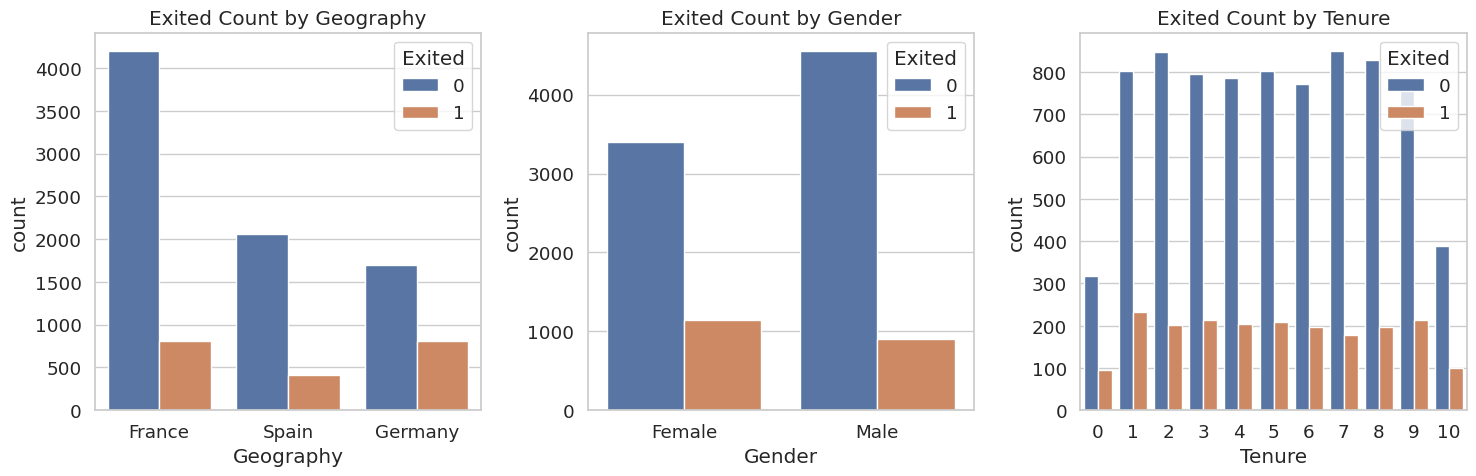

In [39]:
fig, axarr = plt.subplots(1, 3, figsize=(15, 5))

# Visualize the count of Exited and NotExited for each feature
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0])
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[1])
sns.countplot(x='Tenure', hue='Exited', data=df, ax=axarr[2])

# Set titles for the subplots
axarr[0].set_title('Exited Count by Geography')
axarr[1].set_title('Exited Count by Gender')
axarr[2].set_title('Exited Count by Tenure')

# Show the plots
plt.tight_layout()
plt.show()







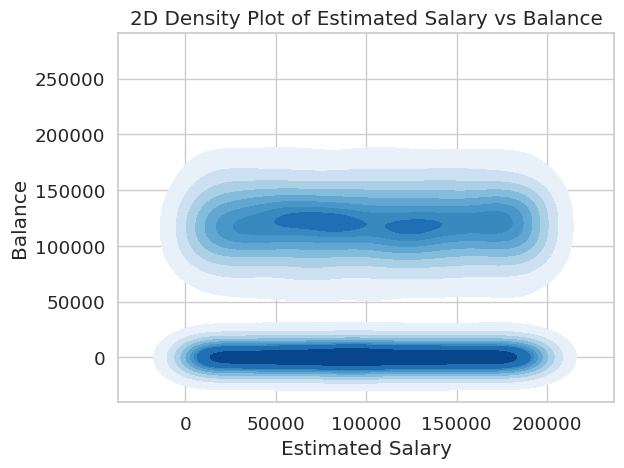

In [47]:
sns.kdeplot(x='EstimatedSalary', y='Balance', data=df, cmap='Blues', fill=True)
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('2D Density Plot of Estimated Salary vs Balance')
plt.show()


<ipython-input-50-f06e5036d513>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


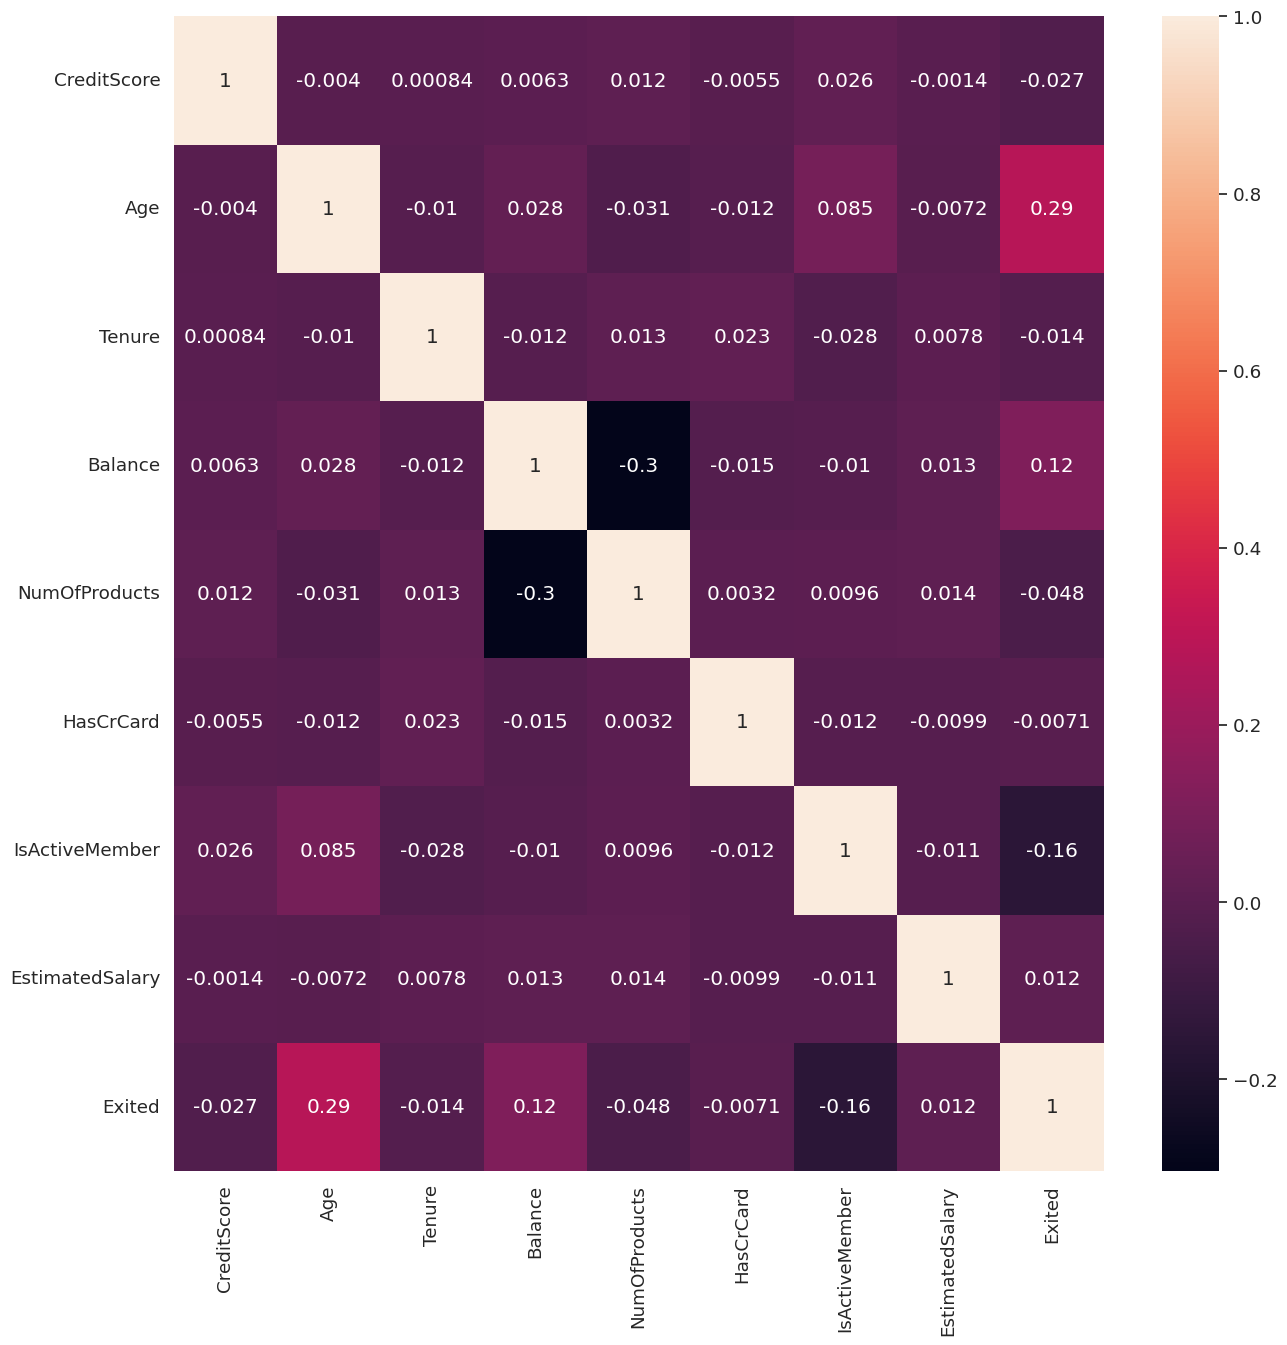

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

# One-Hot Encoding

In [4]:
#apply one hot encodeing to  Gender and Geography
data = pd.get_dummies(data = df ,columns=['Gender', 'Geography'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


# Applying ML Models

In [5]:
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score

In [7]:
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain']]


In [8]:
y = data['Exited']

**Logistic Regression Model**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
lr_fit = lr.fit(X_train, y_train)

In [12]:
lr_prediction_train_ = lr_fit.predict(X_train)
print("Test accuracy for logistic regression", accuracy_score(lr_prediction_train_, y_train)*100,"%")
print("AUC score for logistic regression", roc_auc_score(lr_prediction_train_, y_train))

Test accuracy for logistic regression 78.77333333333333 %
AUC score for logistic regression 0.5957499496631481


In [13]:
y_pred_lr = lr_fit.predict(X_test)

In [14]:
print("Test accuracy for logistic regression", accuracy_score(y_test, y_pred_lr)*100,"%")
print("AUC score for logistic regression", roc_auc_score(y_test, y_pred_lr))

Test accuracy for logistic regression 79.75999999999999 %
AUC score for logistic regression 0.5295226174822273


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_lr)
print(f"F1-score: {f1:.2f}")

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.80
Precision: 0.45
Recall: 0.08
F1-score: 0.14
Confusion Matrix:
[[1952   51]
 [ 455   42]]


**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
rf = RandomForestClassifier(n_estimators=100)

In [22]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [23]:
print("Test accuracy for Random forest classifier", accuracy_score(y_test, y_pred_rf)*100,"%")
print("AUC score for Random forest classifier", roc_auc_score(y_test, y_pred_rf))

Test accuracy for Random forest classifier 100.0 %
AUC score for Random forest classifier 1.0


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred_rf)
print(f"F1-score: {f1:.2f}")

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(confusion)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Confusion Matrix:
[[2003    0]
 [   0  497]]
